In [2]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image

In [3]:
upload = files.upload()


Saving mutalib.jpg to mutalib.jpg


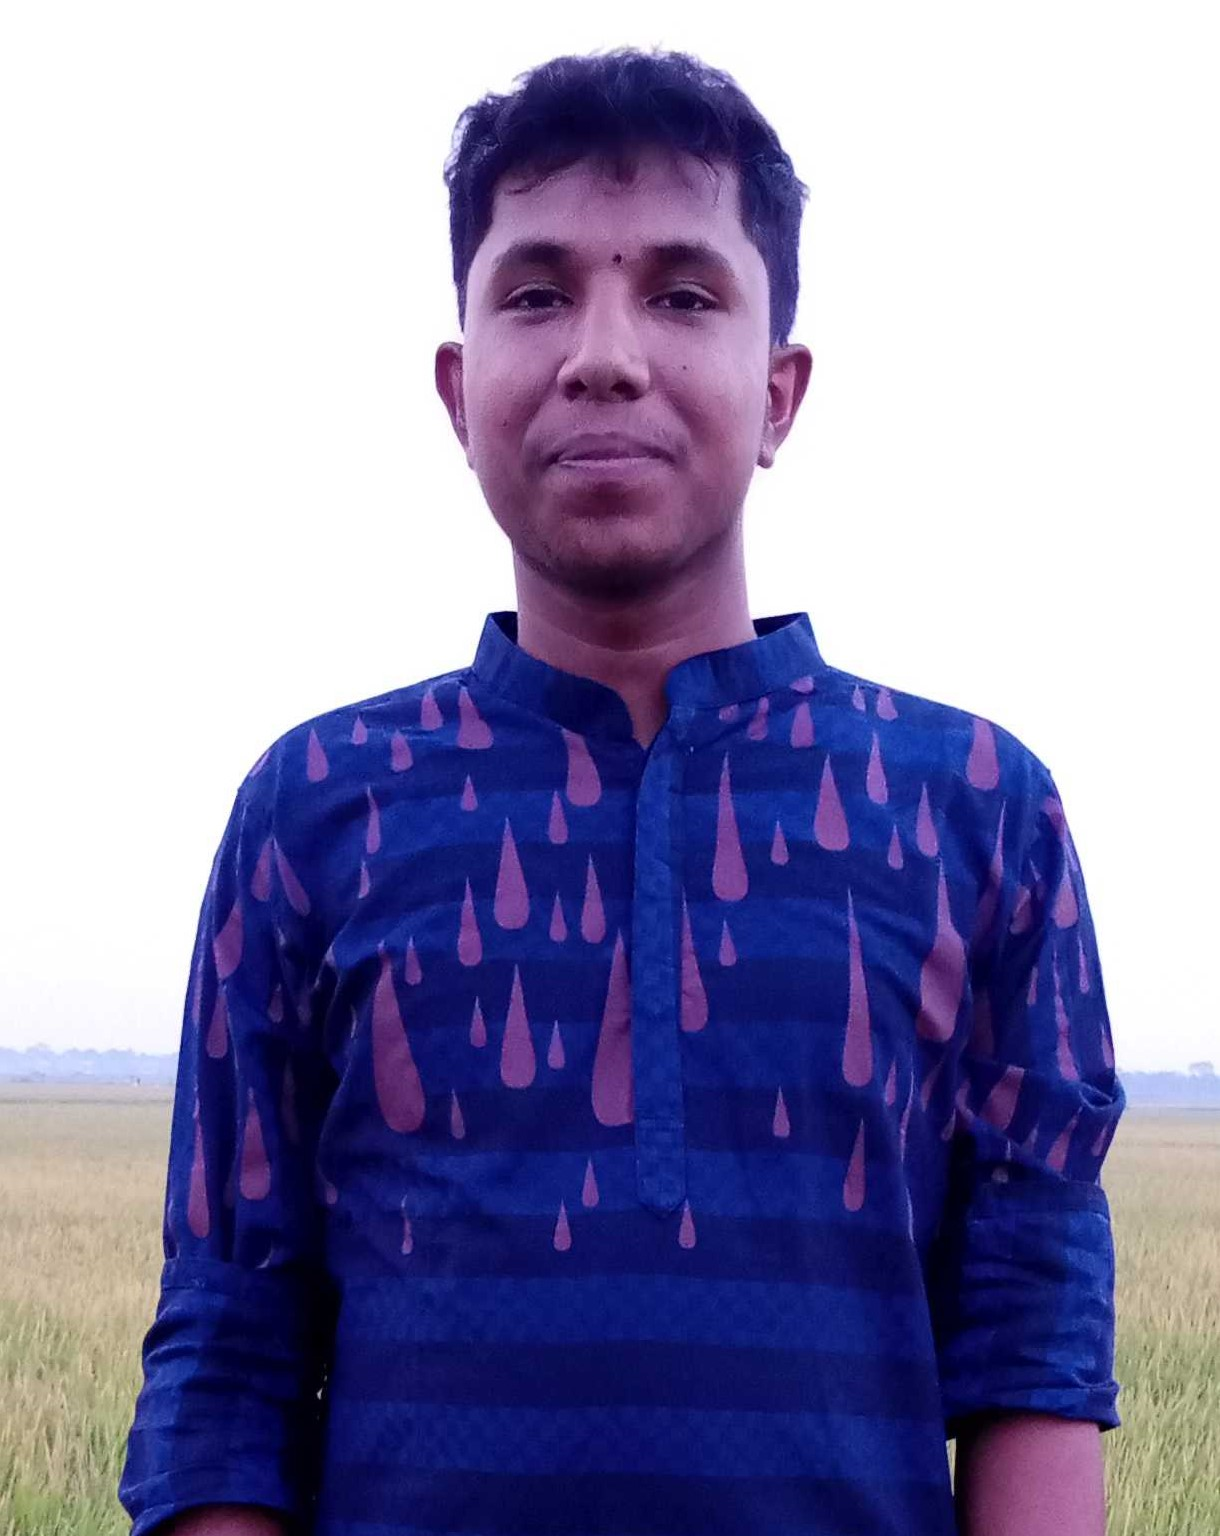

In [5]:
Image('mutalib.jpg',width=300)

In [6]:
import cv2
import numpy as np

image_path = list(upload.keys())[0]
image = cv2.imread(image_path)

In [7]:
resized_img = cv2.resize(image,(100,100))
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
# resized_img = cv2.resize(gray,(100,100))
flipped_image = cv2.flip(gray, 1)
#for rotation
def rotate_image(image):
    rotated_images = []
    angles = [5, 7, -9]

    for angle in angles:
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        rotated_images.append(rotated)

    return rotated_images

#for translation
def translate_image(image):
    translated_images = []
    translate_factors = [(5, 7.5), (5, 5), (-5, -5)]

    for translate_factor in translate_factors:
        (h, w) = image.shape[:2]
        M = np.float32([[1, 0, translate_factor[0]], [0, 1, translate_factor[1]]])
        translated = cv2.warpAffine(image, M, (w, h))
        translated_images.append(translated)

    return translated_images

(1536, 1220, 3)
(100, 100)


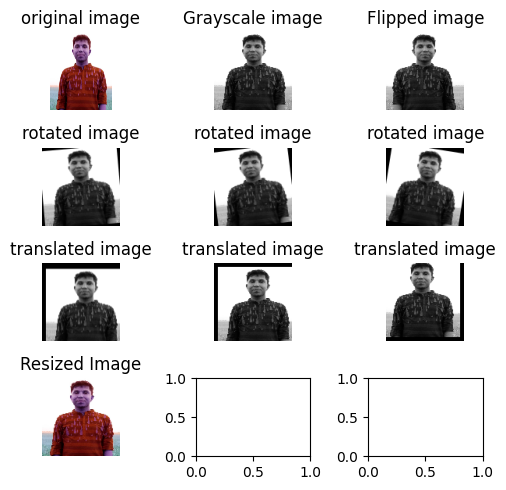

In [8]:
from pickleshare import print_function
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(4, 3, figsize=(5, 5))

#original image
axs[0][0].imshow(image, cmap='gray')
axs[0][0].set_title('original image')
axs[0][0].axis('off')
print(image.shape)

# Display the grayscale image
axs[0][1].imshow(gray, cmap='gray')
axs[0][1].set_title('Grayscale image')
axs[0][1].axis('off')
print(gray.shape)

# Display the flipped image
axs[0][2].imshow(flipped_image, cmap='gray')
axs[0][2].set_title('Flipped image')
axs[0][2].axis('off')

#display the rotated images
rota_img = rotate_image(gray)
axs[1][0].imshow(rota_img[0], cmap='gray')
axs[1][0].set_title('rotated image')
axs[1][0].axis('off')
axs[1][1].imshow(rota_img[1], cmap='gray')
axs[1][1].set_title('rotated image')
axs[1][1].axis('off')
axs[1][2].imshow(rota_img[2], cmap='gray')
axs[1][2].set_title('rotated image')
axs[1][2].axis('off')

#display the translated image
trans_img = translate_image(gray)
axs[2][0].imshow(trans_img[0], cmap='gray')
axs[2][0].set_title('translated image')
axs[2][0].axis('off')
axs[2][1].imshow(trans_img[1], cmap='gray')
axs[2][1].set_title('translated image')
axs[2][1].axis('off')
axs[2][2].imshow(trans_img[2], cmap='gray')
axs[2][2].set_title('translated image')
axs[2][2].axis('off')

# display the resized image
axs[3][0].imshow(resized_img, cmap='gray')
axs[3][0].set_title('Resized Image')
axs[3][0].axis('off')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

